In [1]:
from __future__ import division, print_function

import dicom
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

%matplotlib inline

## Test masking for PatientData class

In [2]:
import sys
sys.path.append("/Users/chuckyee/Developer/software/cardiac-segmentation/src/")
import patient

In [3]:
p = patient.PatientData("../../../datasets/cardiac-mri/TrainingSet/patient09/")

In [12]:
endo = np.loadtxt("../test-assets/patient09/endocardium-p09-0020.mask")
epi = np.loadtxt("../test-assets/patient09/epicardium-p09-0020.mask")

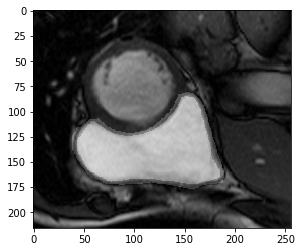

In [18]:
plt.imshow(p.images[0], cmap=plt.cm.gray)
plt.imshow(endo, cmap=plt.cm.gray, alpha=0.2)
plt.imshow(epi, cmap=plt.cm.gray, alpha=0.2)

In [58]:
BW_8BIT = 'L'
polygon = list(zip(inner[0], inner[1]))
height, width = plan.pixel_array.shape
img = Image.new(BW_8BIT, (width, height), color=0)
ImageDraw.Draw(img).polygon(polygon, outline=1, fill=1)
mask = np.array(img)

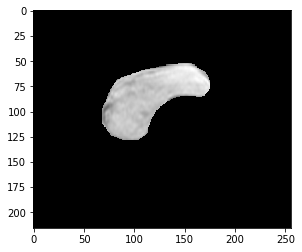

In [23]:
plt.imshow(mask * plan.pixel_array, cmap=plt.cm.gray)

(array([  2.00000000e+00,   1.50000000e+01,   4.20000000e+01,
          8.90000000e+01,   1.95000000e+02,   6.07000000e+02,
          2.13300000e+03,   9.43000000e+02,   5.34000000e+02,
          1.66000000e+02]),
 array([ 126. ,  152.9,  179.8,  206.7,  233.6,  260.5,  287.4,  314.3,
         341.2,  368.1,  395. ]),
 <a list of 10 Patch objects>)

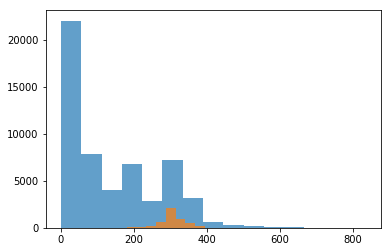

In [51]:
x = (mask*plan.pixel_array).flatten()
y = plan.pixel_array.flatten()
plt.hist(y, bins=15, alpha=0.7)
plt.hist(x[np.nonzero(x)], alpha=0.7)

## Plot Manual Contours

Plot all contours for each patient.

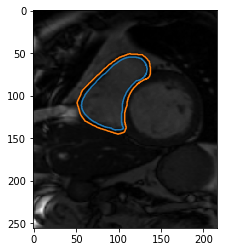

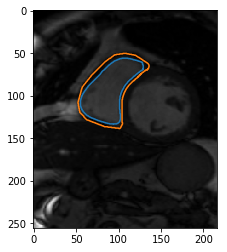

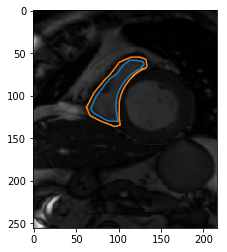

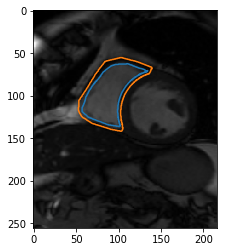

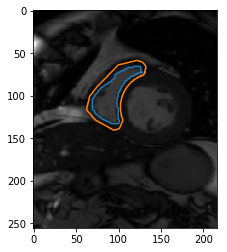

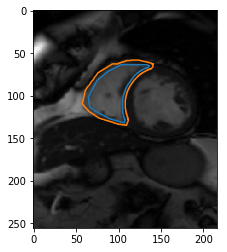

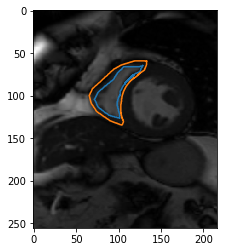

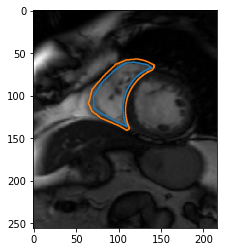

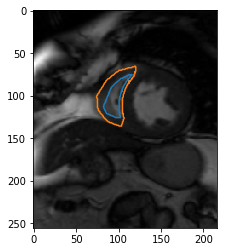

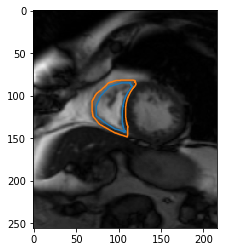

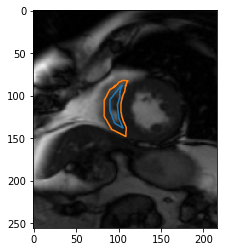

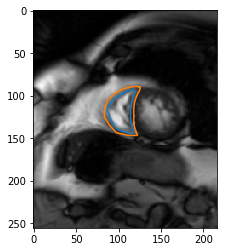

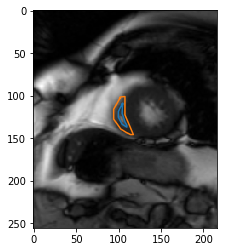

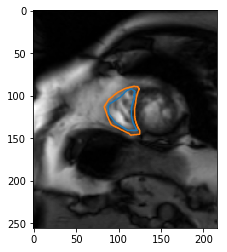

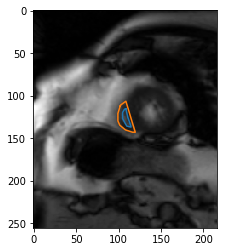

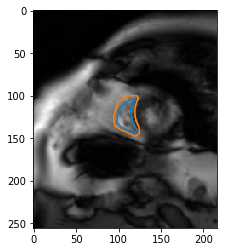

In [175]:
with open("patient01/P01list.txt", 'r') as f:
    data = [line.strip() for line in f.readlines()]

inner_files = [path.replace("\\", "/") for path in data[0::2]]
outer_files = [path.replace("\\", "/") for path in data[1::2]]

for inner_file, outer_file in zip(inner_files, outer_files):
    inner_x, inner_y = np.loadtxt(inner_file).T
    outer_x, outer_y = np.loadtxt(outer_file).T
    match = re.search("P..-(....)-.contour", inner_file)
    frame_number = match.group(1)
    plan = dicom.read_file("patient01/P01dicom/P01-{}.dcm".format(frame_number))
    plt.figure()
    plt.imshow(plan.pixel_array, cmap=plt.cm.gray)
    plt.plot(inner_x, inner_y)
    plt.plot(outer_x, outer_y)

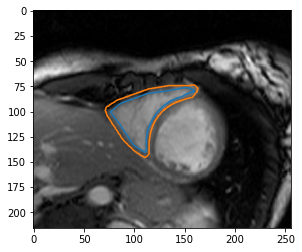

In [173]:
x="08"
inner = np.loadtxt("patient{}/P{}contours-manual/P{}-0140-icontour-manual.txt".format(x,x,x)).T
outer = np.loadtxt("patient{}/P{}contours-manual/P{}-0140-ocontour-manual.txt".format(x,x,x)).T
plan = dicom.read_file("patient{}/P{}dicom/P{}-0140.dcm".format(x,x,x))
plt.imshow(plan.pixel_array, cmap=plt.cm.gray)
plt.plot(inner[0], inner[1])
plt.plot(outer[0], outer[1])

## Generate Video

Create videos of beating heart of each patient. Grayscale frames are scaled by their maximum value.

In [122]:
import glob
import cv2

In [129]:
def dicom_files_to_video(dicom_files, outfile):
    height, width = dicom.read_file(dicom_files[0]).pixel_array.shape
    FPS = 24
    video = cv2.VideoWriter(outfile, -1, FPS, (width, height))
    for dicom_file in dicom_files:
        plan = dicom.read_file(dicom_file)
        frame = plan.pixel_array.astype(float)
        scale = max(frame.flat)
        image = np.asarray(255*frame/scale, dtype='uint8')
        video.write(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR))
    video.release()

In [133]:
for i in range(1, 14):
    glob_expr = "patient{:02d}/*/*.dcm".format(i)
    outfile = "out{:02d}.mp4".format(i)
    dicom_files_to_video(glob.glob(glob_expr), outfile)

In [177]:
for i in range(1, 14):
    glob_expr = "patient{:02d}/*/*.dcm".format(i)
    plan = dicom.read_file(glob.glob(glob_expr)[0])
    print(plan.pixel_array.shape)

(256, 216)
(216, 256)
(256, 216)
(256, 216)
(256, 216)
(256, 216)
(256, 216)
(216, 256)
(256, 216)
(256, 216)
(256, 216)
(256, 216)
(256, 216)
